# Sign language digits recognition with Tensorflow

## Importing the libraries

In [12]:
# Libraries to manage the dataset
import os
from shutil import copyfile
import glob

# Deep leearnig and machine learning libraries (Keras and scikit learn)
from os import listdir
import tensorflow as tf
from tensorflow.python.framework import ops
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Classic libraries with python
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

<a id="Data"></a>
## A look at the data

In [45]:
# Settings:
img_size = 64
num_class = 11

def get_img(data_path):
    # Getting image array from path:
    img = cv2.imread(data_path, 0)
    img = cv2.resize(img, (img_size, img_size))
    return img

def get_dataset(dataset_path='dataset'):
    labels = listdir(dataset_path) # Geting labels
    print(labels)
    X = []
    Y = []
    for i, label in enumerate(labels):
        datas_path = dataset_path+'/'+label
        for data in listdir(datas_path):
            img = get_img(datas_path+'/'+data)
            X.append(img)
            Y.append(label)
    # Create dateset:
    X = np.array(X).astype('float32')
    print(X[1])
    # Normalized the input
    X = (X - np.min(X))/(np.max(X) - np.min(X))
    print(X[1])
    Y = np.array(Y).astype('float32')
    print(Y[1])
    # Categorize the output into binary class matrix
    Y = tf.keras.utils.to_categorical(Y, num_class)
    print(Y[1])
    return X, Y

X,Y = get_dataset()
# add another axis representing grey-scale
X_axis = X[:,:,:,np.newaxis]
print(Y)
# Split the test set and validatio set
X_train, X_test, Y_train, Y_test = train_test_split(X_axis, Y, test_size = 0.2 , random_state = 42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2 , random_state = 42)


['0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9']
[[177. 179. 180. ... 171. 169. 167.]
 [177. 179. 180. ... 172. 171. 168.]
 [177. 180. 181. ... 171. 169. 168.]
 ...
 [145. 146. 148. ... 139. 138. 137.]
 [143. 144. 146. ... 136. 136. 134.]
 [140. 141. 144. ... 134. 133. 132.]]
[[ 0.31620246  0.36621982  0.3912285  ...  0.16615036  0.116133
   0.06611563]
 [ 0.31620246  0.36621982  0.3912285  ...  0.19115904  0.16615036
   0.09112431]
 [ 0.31620246  0.3912285   0.41623718 ...  0.16615036  0.116133
   0.09112431]
 ...
 [-0.48407537 -0.4590667  -0.4090493  ... -0.63412744 -0.6591361
  -0.6841448 ]
 [-0.5340927  -0.50908405 -0.4590667  ... -0.7091535  -0.7091535
  -0.75917083]
 [-0.60911876 -0.5841101  -0.50908405 ... -0.75917083 -0.7841795
  -0.80918825]]
0.0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [24]:
print ("Total number of images = " + str(X.shape[0]))
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("number of test examples = " + str(X_val.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))


Total number of images = 2219
number of training examples = 1420
number of test examples = 444
number of test examples = 355
X_train shape: (1420, 64, 64, 1)
Y_train shape: (1420, 11)
X_test shape: (444, 64, 64, 1)
Y_test shape: (444, 11)


<a id='neuralNet'></a>

## Model 1: Create our ANN Model

In [26]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(num_class, activation=tf.nn.softmax)
])

model1.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
tensorboard = tf.keras.callbacks.TensorBoard(log_dir="logs/model1")
model1.fit(X_train, Y_train, batch_size=32, validation_data=[X_val, Y_val], epochs=30, callbacks=[tensorboard])

Train on 1420 samples, validate on 355 samples
Epoch 1/30
1420/1420 [==============================] - 2s 2ms/step - loss: 2.0954 - acc: 0.3901 - val_loss: 1.1058 - val_acc: 0.6338
Epoch 2/30
1420/1420 [==============================] - 2s 1ms/step - loss: 1.0343 - acc: 0.6528 - val_loss: 0.8481 - val_acc: 0.7380
Epoch 3/30
1420/1420 [==============================] - 2s 1ms/step - loss: 0.7594 - acc: 0.7387 - val_loss: 0.7282 - val_acc: 0.7521
Epoch 4/30
1420/1420 [==============================] - 2s 2ms/step - loss: 0.6104 - acc: 0.8007 - val_loss: 0.7725 - val_acc: 0.7324
Epoch 5/30
1420/1420 [==============================] - 2s 2ms/step - loss: 0.5065 - acc: 0.8218 - val_loss: 0.6385 - val_acc: 0.7944
Epoch 6/30
1420/1420 [==============================] - 2s 2ms/step - loss: 0.4598 - acc: 0.8472 - val_loss: 0.6819 - val_acc: 0.7746
Epoch 7/30
1420/1420 [==============================] - 2s 2ms/step - loss: 0.4324 - acc: 0.8570 - val_loss: 0.6374 - val_acc: 0.7944
Epoch 8/30
1420

<a id='runTheModel'></a>

## Evaluate the result of Model 1

In [27]:
model1.summary()
score = model1.evaluate(X_test, Y_test)
print('Loss: {:.4f}  Accuaracy: {:.4}%'.format(score[0],score[1]))



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               2097664   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 11)                2827      
Total params: 2,231,819
Trainable params: 2,231,819
Non-trainable params: 0
_________________________________________________________________


<a id='CNNModel'></a>

## Model 2: Create our CNN Model

In [28]:
# build our CNN
model2 = tf.keras.models.Sequential()
# Convolutional Blocks: (1) Convolution, (2) Activation, (3) Pooling
model2.add(tf.keras.layers.Conv2D(input_shape=(64, 64, 1), filters=64, kernel_size=(4,4), strides=(2)))
model2.add(tf.keras.layers.Activation('relu'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=2))
#outputs a (20, 20, 32) matrix
model2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(4,4), strides=(1)))
model2.add(tf.keras.layers.Activation('relu'))
#outputs a (8, 8, 32) matrix
model2.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# dropout helps with over fitting by randomly dropping nodes each epoch
model2.add(tf.keras.layers.Dropout(0.3))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(256, activation='relu'))
model2.add(tf.keras.layers.BatchNormalization())

model2.add(tf.keras.layers.Dense(num_class, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
tensorboard = tf.keras.callbacks.TensorBoard(log_dir="logs/model2")
model2.fit(X_train, Y_train, batch_size=32, validation_data=[X_val, Y_val], epochs=30, callbacks=[tensorboard])


Train on 1420 samples, validate on 355 samples
Epoch 1/30
1420/1420 [==============================] - 6s 4ms/step - loss: 1.2737 - acc: 0.5979 - val_loss: 0.9618 - val_acc: 0.7183
Epoch 2/30
1420/1420 [==============================] - 5s 3ms/step - loss: 0.5041 - acc: 0.8366 - val_loss: 0.7027 - val_acc: 0.8225
Epoch 3/30
1420/1420 [==============================] - 4s 3ms/step - loss: 0.3021 - acc: 0.9077 - val_loss: 0.5038 - val_acc: 0.8732
Epoch 4/30
1420/1420 [==============================] - 5s 3ms/step - loss: 0.2204 - acc: 0.9317 - val_loss: 0.3739 - val_acc: 0.9155
Epoch 5/30
1420/1420 [==============================] - 4s 3ms/step - loss: 0.1567 - acc: 0.9535 - val_loss: 0.3629 - val_acc: 0.8704
Epoch 6/30
1420/1420 [==============================] - 5s 3ms/step - loss: 0.1092 - acc: 0.9725 - val_loss: 0.2648 - val_acc: 0.9352
Epoch 7/30
1420/1420 [==============================] - 5s 3ms/step - loss: 0.0800 - acc: 0.9803 - val_loss: 0.1989 - val_acc: 0.9268
Epoch 8/30
1420

<a id='runTheModel'></a>

## Evaluate the result of Model 2

In [29]:
model2.summary()
score = model2.evaluate(X_test, Y_test, verbose=0)
print('Loss: {:.4f}  Accuaracy: {:.4}%'.format(score[0],score[1]))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 31, 31, 64)        1088      
_________________________________________________________________
activation_6 (Activation)    (None, 31, 31, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 64)        65600     
_________________________________________________________________
activation_7 (Activation)    (None, 12, 12, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 6, 6, 64)          0         
__________

## Predict the image

Correct Result is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] , Answer is  [10]
Predicted Result from Neural net: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] , Predicted Answer is  [10]
Predicted Result from CNN: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] , Predicted Answer is  [10]


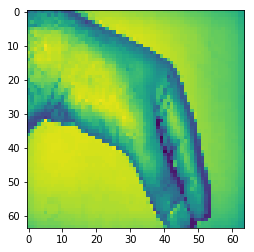

In [49]:
testNum = 500
test_image = X_axis[testNum]
plt.imshow(test_image[:,:,0])
test_image = np.expand_dims(test_image, axis = 0)

result1 = model1.predict(test_image)
result2 = model2.predict(test_image)
# For external image
# test_image = get_img('./test.jpg')
# plt.imshow(test_img)
# test_image = np.expand_dims(test_image, axis = 0)
# test_image = test_image[:,:,:,np.newaxis]
# test_image = np.array(test_image).astype('float32')
# # Normalized the input
# test_image = (test_image - np.min(test_image))/ (np.max(test_image) - np.min(test_image) )

result1 = model1.predict(test_image)
result2 = model2.predict(test_image)
result1_val = [i for i, j in enumerate(np.round(result1,1)[0]) if j == max(np.round(result1,1)[0])]
result2_val = [i for i, j in enumerate(np.round(result2,1)[0]) if j == max(np.round(result2,1)[0])]
print('Correct Result is ',Y[testNum], ', Answer is ',[i for i, j in enumerate(Y[testNum]) if j == max(Y[testNum])])
print('Predicted Result from Neural net:',   np.round(result1,1)[0], ', Predicted Answer is ',result1_val)
print('Predicted Result from CNN:', np.round(result2,1)[0], ', Predicted Answer is ',result2_val)

# Model 3: CNN Model with Image Augmentation

In [7]:
# Create a more diverse dataset by rotating, shifting and zooming the image
datagen = ImageDataGenerator(
    rotation_range=16,
    width_shift_range=0.12,
    height_shift_range=0.12,
    zoom_range=0.12
    )
   
datagen.fit(X_train)


# Model3: Add Image Generate
# build our CNN
model3 = tf.keras.models.Sequential()

# Convolutional Blocks: (1) Convolution, (2) Activation, (3) Pooling
model3.add(tf.keras.layers.Conv2D(input_shape=(64, 64, 1), filters=64, kernel_size=(4,4), strides=(2)))
model3.add(tf.keras.layers.Activation('relu'))
model3.add(tf.keras.layers.MaxPooling2D(pool_size=2))
#outputs a (20, 20, 32) matrix
model3.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(4,4), strides=(1)))
model3.add(tf.keras.layers.Activation('relu'))
#outputs a (8, 8, 32) matrix
model3.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# dropout helps with over fitting by randomly dropping nodes each epoch
model3.add(tf.keras.layers.Dropout(0.3))

model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(256, activation='relu'))
model3.add(tf.keras.layers.BatchNormalization())

model3.add(tf.keras.layers.Dense(10, activation='softmax'))

model3.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
tensorboard = tf.keras.callbacks.TensorBoard(log_dir="logs/model2")
model3.fit_generator(datagen.flow(X_train, Y_train, batch_size=32), validation_data=(X_val, Y_val), epochs=5, callbacks=[tensorboard])

Epoch 1/5
42/42 [==============================] - 8s 187ms/step - loss: 2.1609 - acc: 0.3100 - val_loss: 2.5242 - val_acc: 0.2182
Epoch 2/5
42/42 [==============================] - 5s 131ms/step - loss: 1.5108 - acc: 0.4834 - val_loss: 1.0351 - val_acc: 0.6424
Epoch 3/5
42/42 [==============================] - 6s 131ms/step - loss: 1.0750 - acc: 0.6100 - val_loss: 0.8356 - val_acc: 0.7818
Epoch 4/5
42/42 [==============================] - 5s 109ms/step - loss: 0.8608 - acc: 0.7045 - val_loss: 0.7343 - val_acc: 0.8394
Epoch 5/5
42/42 [==============================] - 5s 121ms/step - loss: 0.7517 - acc: 0.7410 - val_loss: 0.9734 - val_acc: 0.6455


## Evaluate the result of Model 3

In [10]:
model3.summary()
tf.keras.models.save_model(
    model3,
    "./CNN_model.h5",
    overwrite=True,
    include_optimizer=True
)
score = model3.evaluate(X_test, Y_test, verbose=0)
print('Loss: {:.4f}  Accuaracy: {:.4}%'.format(score[0],score[1]))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 31, 31, 64)        1088      
_________________________________________________________________
activation_4 (Activation)    (None, 31, 31, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        65600     
_________________________________________________________________
activation_5 (Activation)    (None, 12, 12, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 64)          0         
__________

Yay ! We clearly see an improvement ! 